<a href="https://colab.research.google.com/github/Siu0901/AI_study/blob/main/%EC%B4%88%EA%B0%84%EB%8B%A8_pytorch(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch 초간단 사용법

- Tensor 생성
- 자동 미분 (Autograd)
- 선형 회귀 (Pytorch에서의 학습 로직)
- MNIST 분류기 (데이터셋 불러오기, 모델 정의)
- CNN 블록 (Layer 사용)
- 그 이후.....

## 1. Tensor 생성하기

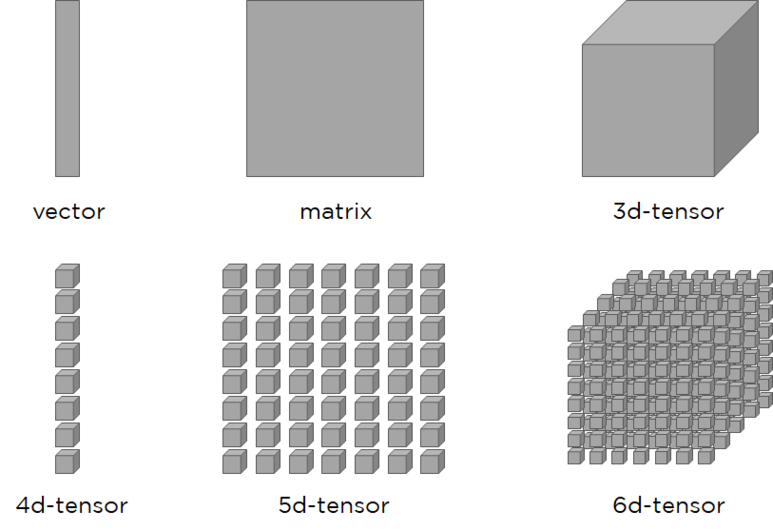

간단하게 설명해서 그냥 **숫자의 배열**이라고 생각하면 됨

np.array()로 생성하거나, torch.tensor()를 이용해서 텐서를 생성.

numpy -> ndarray (CPU 연산) / torch -> tensor (GPU 연산)
tensor가 **GPU**연산에 특화된 형태 (ndarray <-> tensor 변환 자유로움)

In [ ]:
import torch
import numpy as np

t1 = np.array([4., 3.]) # ndarray 형태
t2 = torch.tensor([4.0, 3.0], requires_grad=True) # tensor, requires_grad는 자동 미분 여부 결정
print(t1, t2)

print(type(t1), type(t2))

[4. 3.] tensor([[[[4.0000, 3.0000],
          [5.1000, 4.3000]]]], requires_grad=True)
<class 'numpy.ndarray'> <class 'torch.Tensor'>


## 2. Autograd 사용

- 모델 학습과정에서 파라미터를 조정하는 과정인 **역전파** 과정에 필요한 연산 수행 (미분)
- 미분은 순전파 과정에서 나온 loss(손실 함수를 거쳐 나온 손실값)를 어떻게 줄여야하는지 알려줌

숙제
- 2차함수 역전파 과정 구현하기

데이터 -> 가공 -> 모델(순전파 -> 손실함수를 이용해 loss -> loss값을 이용해서 파라미터를 조정하는 과정) * epoch수 -> 모델 검증 -> 실제 사용을 하거나 등등?

In [ ]:
import torch

params = torch.tensor([.0, .0], requires_grad=True) # 초기 파라미터 값 (w=0, b=0)
x, y = 1, 3 # 입력값, 정답값

# 요 과정이 모델 학습의 메인
y_pred = params[0] * x + params[1] # 우리가 학습할 함수 (w, b 구하기)
loss = (y - y_pred)**2 # 손실 값 / 손실함수 (MSE)
loss.backward() # 미분연산 수행 -> w, b 새로 구하기

print(params.grad) # 역전파를 진행한 결과값
# -6, -6

# 파라미터 업데이트 / 최적화 함수
params = params - params.grad * 0.1 # 0.1은 learning rate

print(params) # 수정된 파라미터

tensor([-6., -6.])
tensor([0.6000, 0.6000], grad_fn=<SubBackward0>)


In [ ]:
# todo - 2차 함수에 대한 학습 과정 진행하기
# y = 2x^2 + 3x - 4에 대한 역전파, 파라미터 변경 과정 수행
import torch

params = torch.tensor([.0, .0, .0], requires_grad=True) # 왜 3개일까?
lr = 0.1 # 학습률 고정

# 이어서 코드 작성하시오.
x, y = 1,1

# 가중치 2개, 편향 1개
y_pred = params[0] * x**2 + params[1] * x + params[2]
loss = (y - y_pred)**2
loss.backward()

print(params.grad)

params = params - params.grad * lr

print(params)

## 3. 선형회귀 사용

- 독립 변수의 값과 종속 변수의 값 사이 상관관계를 예측하는 것
- 일차함수에서 x값에 대한 y값을 예측하는 것이라고 생각하면 편함

학습 과정
1. 데이터 불러오기 (y = 2x + 1 조건에 맞는 난수 생성)
2. 모델 정의 (Linear라는 선형 모델 정의, input/output 각각 1개씩으로 정의)
3. 손실 함수 정의 (평균제곱오차 사용)
4. 최적화 함수 정의 (모델의 파라미터 조정을 위해 사용)
5. epochs 만큼 학습 진행
6. 모델 검증 (지금은 없음)

숙제
- epoch, batch, iteration 차이 알아오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 정답 데이터 (y = 2x + 1)
x = torch.randn(100, 1) # 정수 난수 생성
y = 2 * x + 1

# y = 2x + 1 함수를 찾는 모델
model = nn.Linear(1, 1) # input 1개의 값, output 1개의 값
criterion = nn.MSELoss() # 실제 정답과 예측 정답의 차이가 얼만큼 나는지 파악
optimizer = optim.SGD(model.parameters(), lr=0.1) # model의 파라미터 (w, b)를 0.1 학습률로 학습

# 학습
for epoch in range(50): # 50번
    pred = model(x) # x에 대한 예측값
    loss = criterion(pred, y) # loss 구하기

    optimizer.zero_grad() # todo - epoch, batch, iteration 개념 알아오기
    # epoch = 전체 데이터를 한번 학습했을 때의 단위 (예: 2에폭 = 전체 데이터에 대해 총 2번 학습)
    # batch = 전체 데이터에서 몇개씩 학습 할건지에 대한 단위 (예: 200배치 사이즈 = 한번에 200개씩 학습)
    # iteration = 배치 사이즈의 수 (예: 전체 데이터가 2000이고 베치 사이즈가 200일때 iterationsms 10임)

    loss.backward() # 역전파 수행
    optimizer.step() # 파라미터 업데이트 (w - lr * w)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}")

print("학습된 파라미터:", list(model.parameters()))

Epoch [10/50], Loss: 0.1077
Epoch [20/50], Loss: 0.0010
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000
학습된 파라미터: [Parameter containing:
tensor([[2.0000]], requires_grad=True), Parameter containing:
tensor([1.0000], requires_grad=True)]


## 4. MNIST 데이터셋으로 분류기 만들기

- nn.Module로 원하는 커스텀 모델 제작 가능

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim # 최적화 함수
# 데이터 가져올 때 사용
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# 진행도 표시
from tqdm import tqdm

tranform = transforms.ToTensor() # 이미지를 텐서로 변경, 고정
# 학습용 데이터 다운로드
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=tranform) # 데이터 다운로드를 받음
train_loader = DataLoader(train_data, batch_size=64, shuffle=True) # 학습 데이터 불러오기


# 다층 퍼셉트론 (입력층 1개(28*28), 은닉층 1개(128), 출력층 1개(10))
class MLP(nn.Module): # 해당 클래스가 모델 학습용 클래스라고 상속받기
  def __init__(self):
    super().__init__()
    # 모델 정의하기 (Sequential: 블록 하나로 합치기)
    self.layers = nn.Sequential(
        nn.Flatten(), # Linear 사용으로 인해 2차원을 1차원으로 변경
        nn.Linear(28*28, 128), # 입력 -> 은닉
        nn.ReLU(), # 비선형성 추가                              todo - ReLU 사용의 이유

        # 선형 함수는 아무리 층을 구성해도 결국 똑같기 때문에 복잡한 문제에는 쓸 수 없음
        # 렐루와 같은 비선형 함수를 쓰면 다양하고 복잡한 패턴을 사용할 수 있음
        # 그리고 렐루는 음수면 0, 양수면 그 수 그대로 출력해서 속도도 빠르고 기울기 소실도 잘 안일어남

        nn.Linear(128, 10), # 은닉 - 출력 (10개의 숫자로 분류)
    )

  def forward(self, x):
    return self.layers(x)

model = MLP()
criterion = nn.CrossEntropyLoss() # 다중 분류할 때 사용하는 loss
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

for epoch in range(10):
  for images, labels in tqdm(train_loader): # 이미지 묶음(64개 = 1묶음)만큼 반복
    pred = model(images)
    loss = criterion(pred, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")


100%|██████████| 938/938 [00:11<00:00, 82.42it/s]


Epoch: 1, Loss: 0.1993


100%|██████████| 938/938 [00:11<00:00, 80.00it/s]


Epoch: 2, Loss: 0.3088


100%|██████████| 938/938 [00:12<00:00, 73.39it/s]


Epoch: 3, Loss: 0.0480


100%|██████████| 938/938 [00:12<00:00, 77.36it/s]


Epoch: 4, Loss: 0.1651


100%|██████████| 938/938 [00:12<00:00, 77.39it/s]


Epoch: 5, Loss: 0.0663


100%|██████████| 938/938 [00:12<00:00, 77.34it/s]


Epoch: 6, Loss: 0.0535


100%|██████████| 938/938 [00:12<00:00, 77.61it/s]


Epoch: 7, Loss: 0.0114


100%|██████████| 938/938 [00:11<00:00, 78.80it/s]


Epoch: 8, Loss: 0.3363


100%|██████████| 938/938 [00:11<00:00, 78.81it/s]


Epoch: 9, Loss: 0.1688


100%|██████████| 938/938 [00:12<00:00, 75.55it/s]

Epoch: 10, Loss: 0.0424


## 5. CNN 초간단 구현
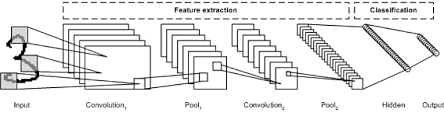

기본적인 CNN 로직
1. Conv2d 거치기 (이미지의 패턴을 뽑아내는 역할)
2. MaxPooling 거치기 (정보 손실 방지, 특징을 살리면서 연산 줄이기)
3. 1~2번 과정을 일정 수만큼 반복
4. 1차원 변형 및 FC Layer 통과

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

transform = transforms.ToTensor()
# 학습 데이터셋과 검증 데이터셋 가져오기
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=tranform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=tranform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # CNN 과정
    self.conv_layers = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = self.conv_layers(x)
    return self.fc_layers(x)

device = "cuda" if torch.cuda.is_available() else "cpu" # 고정
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
  model.train() # 모델 학습모드로 설정
  for batch_size, (images, labels) in tqdm(enumerate(train_loader)):
    images, labels = images.to(device), labels.to(device)

    preds = model(images)
    loss = criterion(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"epoch: {epoch}, loss: {loss.item():.4f}")

def test():
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          preds = model(images)
          predicted = preds.argmax(dim=1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  acc = 100 * correct / total
  print(f"Test Accuracy: {acc:.2f}%")

for epoch in range(4):
  train(epoch+1)
  test()

938it [01:15, 12.44it/s]


epoch: 1, loss: 0.0654
Test Accuracy: 97.86%


938it [01:16, 12.28it/s]


epoch: 2, loss: 0.0053
Test Accuracy: 98.02%


632it [00:50, 13.33it/s]

## 6. Pytorch로 논문 구현 도전
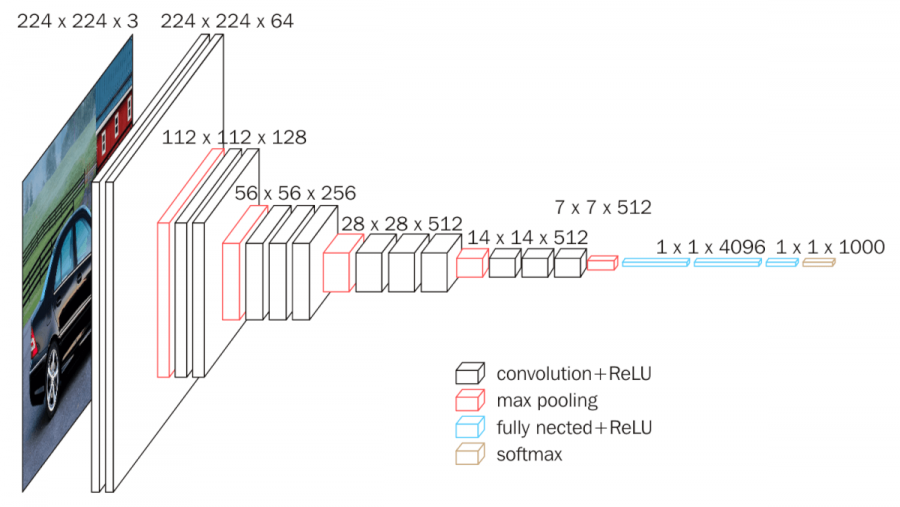

- VGGNet의 아키텍처를 보고 직접 구현해보기
- 새로운 함수 사용 및 커스텀 클래스 만들기

In [ ]:
# 참고
# https://velog.io/@lighthouse97/VGG-Net%EC%9D%98-%EC%9D%B4%ED%95%B4

import torch
import torch.nn as nn

class VGGnet(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGGnet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kenerl_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.maxpool2d(Kernel_size=2, stride=2), # stride=2 크기 절반으로 줄임

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.maxpool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(), # 과적합 방지하기 위해 일부 뉴런 꺼두는 코드
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

        def forward(self, x):
          x = self.conv_layers(x)
          x = torch.flatten(x,1) # 1차원으로 펼치기
          x = self.fc_layers(x)
          return x